In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import pandas as pd
import numpy as np

# sklearn stuff
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# tuning
from sklearn.model_selection import cross_val_score, GridSearchCV #BONUS

# plotting
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("fully_labeled_data.pkl")

In [3]:
X = [] # sentiment labels
y = [] # stock labels

for index,row in data.iterrows():
    row_sent_labels = []
    
    for i in range(1, 26):
        pol = data.at[index, "Top{}_polarity".format(i)]
        row_sent_labels.append(pol)
    X.append(row_sent_labels)
    y.append(data.at[index, "stock_label"])
    
X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
gnb = GaussianNB().fit(X_train, y_train)
log_reg = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
svm = SVC(gamma="auto").fit(X_train, y_train)

In [6]:
# function to report accuracy on cross validation sets
def report_accuracy(moment, clf_name, clf, x_train, y_train):
    cv_error = cross_val_score(clf, x_train, y_train, scoring="accuracy", cv=10)
    print(moment + " customisation, average accuracy of " + clf_name + " : ", cv_error.mean(),
          " standard deviation: ", np.std(cv_error))

In [7]:
report_accuracy("Before", "Bayes", gnb, X_train, y_train)
report_accuracy("Before", "LR", log_reg, X_train, y_train)
report_accuracy("Before", "SVM", svm, X_train, y_train)

Before customisation, average accuracy of Bayes :  0.4770949765146087  standard deviation:  0.024565412285414596
Before customisation, average accuracy of LR :  0.4827637130801688  standard deviation:  0.03754614514951195
Before customisation, average accuracy of SVM :  0.5028464095215349  standard deviation:  0.029845344652739997


In [8]:
def tune_params(clf, param_grid, x_train, y_train):
    grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10)
    grid_search.fit(x_train, y_train)
    best_params = list(grid_search.best_params_.values())

    return best_params

In [9]:
#tune lambda with GridSearchCV
logreg_params = {'C': [0.1, 0.01, 0.001, 1, 10, 100, 1000]} # regularisation params to be considered
best_logreg_params = tune_params(log_reg, logreg_params, X_train, y_train)

In [10]:
log_reg_tuned = LogisticRegression(random_state=0, solver='lbfgs', C=best_logreg_params[0]).fit(X_train, y_train)
report_accuracy("After", "LR", log_reg_tuned, X_train, y_train)

After customisation, average accuracy of LR :  0.526718215110262  standard deviation:  0.0038260477635031214


In [11]:
svm_params = {'gamma': ["auto", "scale"], "kernel": ["linear", "poly", "rbf", "sigmoid"],
                "max_iter": [-1, 1, 10, 100, 1000, 10000, 100000]}
best_svm_params = tune_params(svm, svm_params, X_train, y_train)

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Docume

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hien

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/hienle/

In [12]:
best_svm_params

['scale', 'poly', 100]

In [13]:
svm_c = {'C': [0.1, 0.01, 0.001, 1, 10, 100, 1000]}
best_svm_c = tune_params(svm, svm_c, X_train, y_train)

In [14]:
svm_tuned = SVC(gamma="scale", kernel="poly", max_iter=100, C=best_svm_c[0], probability=True).fit(X_train, y_train)

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [31]:
nb_y_preds = gnb.predict(X_test)
accuracy_score(nb_y_preds, y_test)
print(classification_report(nb_y_preds, y_test))

0.5251256281407035

              precision    recall  f1-score   support

           0       0.34      0.43      0.38       134
           1       0.67      0.57      0.62       264

   micro avg       0.53      0.53      0.53       398
   macro avg       0.50      0.50      0.50       398
weighted avg       0.56      0.53      0.54       398



In [30]:
log_y_preds = log_reg_tuned.predict(X_test)
accuracy_score(log_y_preds, y_test)
print(classification_report(log_y_preds, y_test))

0.5703517587939698

              precision    recall  f1-score   support

           0       0.01      0.50      0.01         2
           1       1.00      0.57      0.73       396

   micro avg       0.57      0.57      0.57       398
   macro avg       0.50      0.54      0.37       398
weighted avg       0.99      0.57      0.72       398



In [29]:
svm_y_preds = svm_tuned.predict(X_test)
accuracy_score(svm_y_preds, y_test)
print(classification_report(svm_y_preds, y_test))

0.5628140703517588

              precision    recall  f1-score   support

           0       0.05      0.42      0.08        19
           1       0.95      0.57      0.71       379

   micro avg       0.56      0.56      0.56       398
   macro avg       0.50      0.50      0.40       398
weighted avg       0.91      0.56      0.68       398



/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


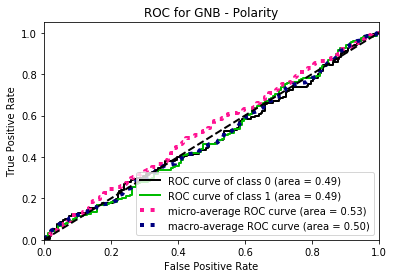

In [24]:
import scikitplot as skplt
gnb_predicted_probas = gnb.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, gnb_predicted_probas, title="ROC for GNB - Polarity")
plt.show()

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


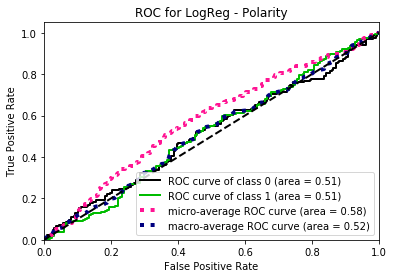

In [25]:
logreg_predicted_probas = log_reg_tuned.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, logreg_predicted_probas, title="ROC for LogReg - Polarity")
plt.show()

/home/hienle/Documents/AUC Studies/6. Sem 6 - Fall 2018/SCI Text Mining and Collective Intelligence/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


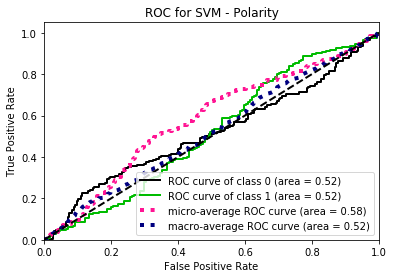

In [26]:
svm_predicted_probas = svm_tuned.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, svm_predicted_probas, title="ROC for SVM - Polarity")
plt.show()